In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Questions:
1. Are the distribution of ratings for recipes based on their category consistent? 
2. Overtime, can you see if there is popularity in certain ingredients showing up? 
3. Correlation with certain types of words, ingrediants used and its popularity

# Import DataFrames

In [38]:
# Import recipes_cut and preview
recipes_df = pd.read_csv("Resources/recipes_cut_2013.csv")
recipes_df.head(5)


,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,DatePublished,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
0,134437,Copycat Wendy&rsquo;s Spicy Chicken Fillet San...,2001112113,PT20M,PT30M,PT50M,2019-02-22 18:59:00,Lunch/Snacks,4.0,3.0,2412.4,235.5,22.2,102.9,784.8,41.9,2.4,3.9,38.0,4.0
1,221240,Copycat Red Lobster Nantucket Baked Cod,2001112113,PT11M,PT5M,PT16M,2019-02-22 18:53:00,Very Low Carbs,NaN,1.0,372.9,16.7,2.9,102.6,486.6,10.7,3.2,6.7,44.9,4.0
2,250325,Copycat Jimmy Dean Breakfast Sausage,2001112113,PT8M,PT3H,PT3H8M,2019-02-22 19:02:00,Breakfast,1.5,5.0,392.5,24.4,9.0,81.8,945.4,23.5,0.9,17.9,19.7,NaN
3,449227,Copycat Panera Bread Spinach &amp; Artichoke S...,2001112113,PT40M,PT10M,PT50M,2019-02-22 18:57:00,Breakfast,5.0,1.0,569.0,40.5,15.5,179.0,664.7,34.5,1.1,3.8,16.8,4.0
4,492718,Tamale Hash,542159,PT3M,PT10M,PT13M,2013-01-01 06:30:00,Breakfast,5.0,2.0,225.1,16.4,5.5,200.8,742.8,9.0,2.0,4.1,11.6,2.0


In [3]:
# Import reviews_cut and preview
reviews_df = pd.read_csv("Resources/reviews_cut_2013.csv")
reviews_df.head(5)

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,52806,33113,52125,sheriboren,5,"This was great,loved it! I also made your Orie...",2020-01-14 01:37:19,2020-01-14T01:37:19Z
1,89250,82903,125411,sandrasothere,5,"This was delicious....so easy to prepare, but ...",2016-04-22 22:15:23,2016-04-22T22:15:23Z
2,95369,55255,58931,Linorama,5,LOVE this! I make it in the VitaMix and it get...,2016-10-20 15:28:18,2016-10-20T15:28:18Z
3,102621,8060,26075,SwoR8193,5,I was looking for a really basic meatball that...,2016-05-23 07:49:56,2016-05-23T07:49:56Z
4,131383,51716,57101,Stephie Biggs,5,"Halfed the butter, used light sour cream and i...",2018-09-27 18:52:00,2018-09-27T18:52:00Z


In [51]:
# Import recipes_ingredients_2013.csv
ingredients_df = pd.read_csv("Resources/recipes_ingredients_2013.csv")
ingredients_df.head(5)

,RecipeId,Name,TotalTime,DatePublished,RecipeCategory,Keywords,RecipeIngredientParts,AggregatedRating,ReviewCount
0,134437,Copycat Wendy&rsquo;s Spicy Chicken Fillet San...,PT50M,2019-02-22T18:59:00Z,Lunch/Snacks,"c(""Chicken"", ""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken breasts"", ""buttermilk"", ""all-purpos...",4.0,3.0
1,221240,Copycat Red Lobster Nantucket Baked Cod,PT16M,2019-02-22T18:53:00Z,Very Low Carbs,"""< 30 Mins""","c(""olive oil"", ""cod fish fillets"", ""lemon juic...",NaN,1.0
2,250325,Copycat Jimmy Dean Breakfast Sausage,PT3H8M,2019-02-22T19:02:00Z,Breakfast,"c(""Pork"", ""Meat"", ""< 4 Hours"")","c(""ground pork"", ""brown sugar"", ""light corn sy...",1.5,5.0
3,449227,Copycat Panera Bread Spinach &amp; Artichoke S...,PT50M,2019-02-22T18:57:00Z,Breakfast,"""< 60 Mins""","c(""unsalted butter"", ""all-purpose flour"", ""sal...",5.0,1.0
4,492718,Tamale Hash,PT13M,2013-01-01T06:30:00Z,Breakfast,"c(""Mexican"", ""< 15 Mins"", ""Easy"")","c(""onion"", ""garlic clove"", ""salsa"", ""Black-Eye...",5.0,2.0


# Question 1: Ratings Based on Category

In [15]:
# Need a cut recipe df with just the recipe category amd recipe id
recipe_categories_df = recipes_df.loc[:,["RecipeId", "RecipeCategory"]]

# Need to rename the "RecipeId" to be "RecipeID"
recipe_categories_df.head()

,RecipeId,RecipeCategory
0,134437,Lunch/Snacks
1,221240,Very Low Carbs
2,250325,Breakfast
3,449227,Breakfast
4,492718,Breakfast


In [ ]:
# Print the unique categories 
categories = recipe_categories_df["RecipeCategory"].unique()
print(categories)

In [20]:
# There are 266 categories
# Will make lists of major categories to sort:
# Tarts and Scones will not be included as they can also be savory (not dessert)
dessert = ["dessert", "Bar Cookie", "Ice Cream", "Cheesecake", "Frozen Dessert", "Candy", "Drop Cookies"]
breakfast = ["Breakfast"]
holiday = ["Memorial Day", "Thanksgiving", "St. Patrick's Day", "Halloween", "Christmas", "Easter"]
healthy = ["Very Low Carbs", "Low Cholesterol", "Healthy", "High Fiber"]
lunch =["Lunch/Snacks"]
quick = ["< 30 Mins", "< 15 Mins", "< 60 Mins", "Weeknight"]

In [14]:
# Need a cut review df with just the recipeid and rating
# Will need to group the reviews by the recipeid and take the average rating. 
reviews_just_rating = reviews_df.loc[:, ["RecipeId", "Rating"]].groupby("RecipeId").mean()
reviews_just_rating.reset_index(inplace=True)
reviews_just_rating


,RecipeId,Rating
0,38,4.00
1,44,2.50
2,49,5.00
3,54,5.00
4,56,4.04
...,...,...
72947,540899,5.00
72948,541001,0.00
72949,541030,5.00
72950,541195,5.00


In [22]:
# Merge the cut dfs 
# Not all recipes may have a rating and not all ratings will have a recipes (if for recipe before 2013) 
# Will use an inner join. 
merged_review_by_category = recipe_categories_df.merge(reviews_just_rating, on="RecipeId", how="inner")

# Round the Rating to the hundreths place
merged_review_by_category['Rating'] = [round(x,1) for x in merged_review_by_category["Rating"]]

merged_review_by_category

,RecipeId,RecipeCategory,Rating
0,134437,Lunch/Snacks,4.4
1,221240,Very Low Carbs,4.5
2,250325,Breakfast,3.4
3,449227,Breakfast,3.6
4,492718,Breakfast,5.0
...,...,...,...
6845,540899,Breads,5.0
6846,541001,Mexican,0.0
6847,541030,< 15 Mins,5.0
6848,541195,Beverages,5.0


In [30]:
# Create smaller dataframes for each categoy:
# Dessert! 
dessert_df = merged_review_by_category.loc[merged_review_by_category["RecipeCategory"].isin(dessert)].groupby("Rating")["RecipeId"].count()

# Breakfast! 
breakfast_df = merged_review_by_category.loc[merged_review_by_category["RecipeCategory"].isin(breakfast)].groupby("Rating")["RecipeId"].count()

# Holiday:
holiday_df = merged_review_by_category.loc[merged_review_by_category["RecipeCategory"].isin(holiday)].groupby("Rating")["RecipeId"].count()

# Healthy! 
healthy_df = merged_review_by_category.loc[merged_review_by_category["RecipeCategory"].isin(healthy)].groupby("Rating")["RecipeId"].count()

# Lunch!
lunch_df = merged_review_by_category.loc[merged_review_by_category["RecipeCategory"].isin(lunch)].groupby("Rating")["RecipeId"].count()

# Quick!
quick_df = merged_review_by_category.loc[merged_review_by_category["RecipeCategory"].isin(quick)].groupby("Rating")["RecipeId"].count()

### Plot the rating by category using pyplots


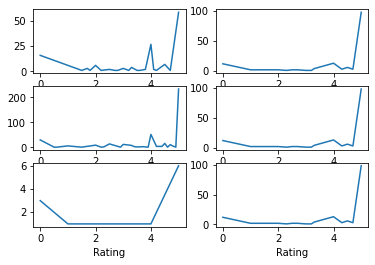

In [35]:
#define subplot layout
fig1, axes1 = plt.subplots(nrows=3, ncols=2)

#add DataFrames to subplots
dessert_df.plot(ax=axes1[0,0])
breakfast_df.plot(ax=axes1[1,0])
holiday_df.plot(ax=axes1[2,0])
healthy_df.plot(ax=axes1[0,1])
healthy_df.plot(ax=axes1[1,1])
healthy_df.plot(ax=axes1[2,1])

plt.show()

# Question 2: Overtime, do certain ingrediants increase in popularity? 

In [44]:
# Will be using the ingredients dataframe
ingredients_df.dtypes

RecipeId                   int64
Name                      object
TotalTime                 object
DatePublished             object
RecipeCategory            object
Keywords                  object
RecipeIngredientParts     object
AggregatedRating         float64
ReviewCount              float64
dtype: object

In [56]:
# Convert the DatePublished column to datetime64
ingredients_df = ingredients_df.astype({'DatePublished': 'datetime64'})

In [57]:
# Find all lines of text that one the buzzwords
p = '[cC]auliflower'        # ? means find 0 or 1 instance of the previous character
cauliflower = ingredients_df[ingredients_df['RecipeIngredientParts'].str.contains(p)]
cauliflower.head(5)

,RecipeId,Name,TotalTime,DatePublished,RecipeCategory,Keywords,RecipeIngredientParts,AggregatedRating,ReviewCount
104,492820,Low-Carb Arroz Imperial (Imperial Rice),PT1H45M,2013-01-02 13:14:00,Cauliflower,"c(""Vegetable"", ""South American"", ""Free Of..."",...","c(""parmesan cheese"", ""ground cumin"", ""ground o...",NaN,NaN
273,492994,French Vegetable Soup,PT6H10M,2013-01-04 12:03:00,Low Cholesterol,"c(""Healthy"", ""Easy"")","c(""chicken broth"", ""diced tomatoes"", ""potatoes...",NaN,NaN
442,493169,Smoky Frittata,PT40M,2013-01-06 21:40:00,Breakfast,"c(""Cheese"", ""Cauliflower"", ""Vegetable"", ""Very ...","c(""cauliflower"", ""eggs"", ""creme fraiche"", ""Dij...",NaN,NaN
540,493268,Sneaky (Healthy) Mac and Cheese,PT1H,2013-01-08 15:17:00,Macaroni And Cheese,"c(""Kid Friendly"", ""< 60 Mins"")","c(""frozen cauliflower"", ""water"", ""milk"", ""shar...",NaN,NaN
569,493298,Cheesy Cauliflower Au Gratin,PT50M,2013-01-08 18:27:00,Vegetable,"c(""Free Of..."", ""< 60 Mins"", ""Easy"")","c(""head cauliflower"", ""butter"", ""sour cream"", ...",5.0,5.0


In [59]:
type(cauliflower)

pandas.core.frame.DataFrame

In [58]:
cauliflower['DatePublished'] = cauliflower['DatePublished'].apply( lambda x: x.date() )
cauliflower

/var/folders/1w/6l663v0951s50_1bzk8c5wt00000gp/T/ipykernel_94543/1467156330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cauliflower['DatePublished'] = cauliflower['DatePublished'].apply( lambda x: x.date() )


,RecipeId,Name,TotalTime,DatePublished,RecipeCategory,Keywords,RecipeIngredientParts,AggregatedRating,ReviewCount
104,492820,Low-Carb Arroz Imperial (Imperial Rice),PT1H45M,2013-01-02,Cauliflower,"c(""Vegetable"", ""South American"", ""Free Of..."",...","c(""parmesan cheese"", ""ground cumin"", ""ground o...",NaN,NaN
273,492994,French Vegetable Soup,PT6H10M,2013-01-04,Low Cholesterol,"c(""Healthy"", ""Easy"")","c(""chicken broth"", ""diced tomatoes"", ""potatoes...",NaN,NaN
442,493169,Smoky Frittata,PT40M,2013-01-06,Breakfast,"c(""Cheese"", ""Cauliflower"", ""Vegetable"", ""Very ...","c(""cauliflower"", ""eggs"", ""creme fraiche"", ""Dij...",NaN,NaN
540,493268,Sneaky (Healthy) Mac and Cheese,PT1H,2013-01-08,Macaroni And Cheese,"c(""Kid Friendly"", ""< 60 Mins"")","c(""frozen cauliflower"", ""water"", ""milk"", ""shar...",NaN,NaN
569,493298,Cheesy Cauliflower Au Gratin,PT50M,2013-01-08,Vegetable,"c(""Free Of..."", ""< 60 Mins"", ""Easy"")","c(""head cauliflower"", ""butter"", ""sour cream"", ...",5.0,5.0
...,...,...,...,...,...,...,...,...,...
46994,541043,"Low Carb, Keto Zuppa Toscana With Cauliflower ...",PT45M,2020-10-05,< 60 Mins,NaN,"c(""ghee"", ""Italian sausage"", ""chicken broth"", ...",NaN,NaN
47064,541115,Spicy Roasted Vegetable Soup With Leftover Gri...,PT1H20M,2020-10-23,Weeknight,"""< 4 Hours""","c(""sweet potato"", ""baby potatoes"", ""turnip"", ""...",NaN,NaN
47105,541156,8 CHEESE VEGETABLE LASAGNA,PT2H,2020-10-30,European,"c(""For Large Groups"", ""< 4 Hours"", ""Easy"")","c(""ricotta cheese"", ""egg"", ""parsley"", ""butter""...",NaN,NaN
47128,541179,SHEET PAN ROOT VEGETABLE HASH,PT55M,2020-11-06,Low Protein,"""< 60 Mins""","c(""kielbasa"", ""sweet potato"", ""apple"", ""brocco...",NaN,NaN


In [62]:
ingredients_df.head()

,RecipeId,Name,TotalTime,DatePublished,RecipeCategory,Keywords,RecipeIngredientParts,AggregatedRating,ReviewCount
0,134437,Copycat Wendy&rsquo;s Spicy Chicken Fillet San...,PT50M,2019-02-22 18:59:00,Lunch/Snacks,"c(""Chicken"", ""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken breasts"", ""buttermilk"", ""all-purpos...",4.0,3.0
1,221240,Copycat Red Lobster Nantucket Baked Cod,PT16M,2019-02-22 18:53:00,Very Low Carbs,"""< 30 Mins""","c(""olive oil"", ""cod fish fillets"", ""lemon juic...",NaN,1.0
2,250325,Copycat Jimmy Dean Breakfast Sausage,PT3H8M,2019-02-22 19:02:00,Breakfast,"c(""Pork"", ""Meat"", ""< 4 Hours"")","c(""ground pork"", ""brown sugar"", ""light corn sy...",1.5,5.0
3,449227,Copycat Panera Bread Spinach &amp; Artichoke S...,PT50M,2019-02-22 18:57:00,Breakfast,"""< 60 Mins""","c(""unsalted butter"", ""all-purpose flour"", ""sal...",5.0,1.0
4,492718,Tamale Hash,PT13M,2013-01-01 06:30:00,Breakfast,"c(""Mexican"", ""< 15 Mins"", ""Easy"")","c(""onion"", ""garlic clove"", ""salsa"", ""Black-Eye...",5.0,2.0


In [60]:
cauliflower_counts = cauliflower.groupby("DatePublished")["Keywords"].count()
cauliflower_counts

DatePublished
2013-01-02    1
2013-01-04    1
2013-01-06    1
2013-01-08    2
2013-01-11    1
             ..
2020-10-05    0
2020-10-23    1
2020-10-30    1
2020-11-06    1
2020-11-23    1
Name: Keywords, Length: 411, dtype: int64

<AxesSubplot:xlabel='DatePublished'>

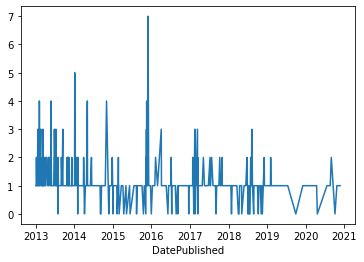

In [61]:
cauliflower_counts.plot()